In [23]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute,QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq import least_busy
from qiskit.circuit.library import QFT
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-12-02 15:36:20,396: Credentials are already in use. The existing account in the session will be replaced.


In [24]:
def set_input_state(a,b):
    get_binary= lambda x: '{0:{fill}3b}'.format(x, fill='0')
    
    #create a quantum circuit
    r_a=QuantumRegister(3,'a')
    r_b=QuantumRegister(3,'b')
    cr=ClassicalRegister(3,'c')
    qc=QuantumCircuit(r_a,r_b,cr)
    
    a=get_binary(a)
    b=get_binary(b)
    
    for i  in range(3):
        if (a[i]=='1'):
            qc.x(r_a[2-i])
        if (b[i]=='1'):
            qc.x(r_b[2-i])
            
    return qc, r_a , r_b , cr

In [25]:
def controlled_rotations(qc,reg_a,reg_b,n,to_gate=True):
    for i in range(0,n+1):
        qc.cu1(np.pi/(2**i),reg_b[n-i],reg_a[n])

In [26]:
a=1
b=3
qc, r_a , r_b , cr= set_input_state(a,b)
qc.append(QFT(3, do_swaps=False),[2,1,0])
for i in range(0,3):
    controlled_rotations(qc,r_a,r_b,2-i)
    
qc.append(QFT(3, do_swaps=False).inverse(),[2,1,0])
qc.measure(r_a,cr)

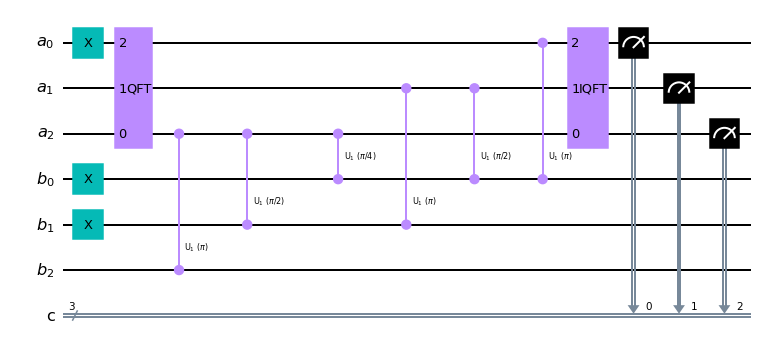

In [27]:
qc.draw("mpl")


In [28]:
backend=Aer.get_backend('qasm_simulator')
result= execute(qc,backend, shots=100).result()

In [29]:
counts=result.get_counts(qc)
print(counts)

{'111': 77, '010': 4, '000': 7, '110': 12}


In [32]:
"{0:b}".format(4)

'100'

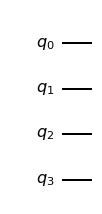

In [31]:
qc=QuantumCircuit(4)
qc.draw()